 Manipulação e análise de dados com R
 Base de dados : https://github.com/AndersonSalata/projeto-integrado-ciencia-de-dados/blob/main/datatran2024.csv

In [ ]:
# importando Bibliotecas

library(dplyr)
library(ggplot2)

# Buscando e baixando a base de dados
url <- ("https://raw.githubusercontent.com/AndersonSalata/projeto-integrado-ciencia-de-dados/main/datatran2024.csv")
download.file(url, destfile = "datatran2024.csv")

# Carregando e lendo os dados
dados <- read.csv("datatran2024.csv", sep = ";", fileEncoding = "latin1", fill = TRUE, check.names = FALSE)

# Exploração inicial
summary(dados)
str(dados)


Realizando operações com o dplry

In [ ]:
#selecionando colunas especificas
dados %>% select(data_inversa, horario, uf, tipo_acidente)

In [ ]:
# aplicando filtro
dados %>% filter(uf == "SP", mortos > 0)

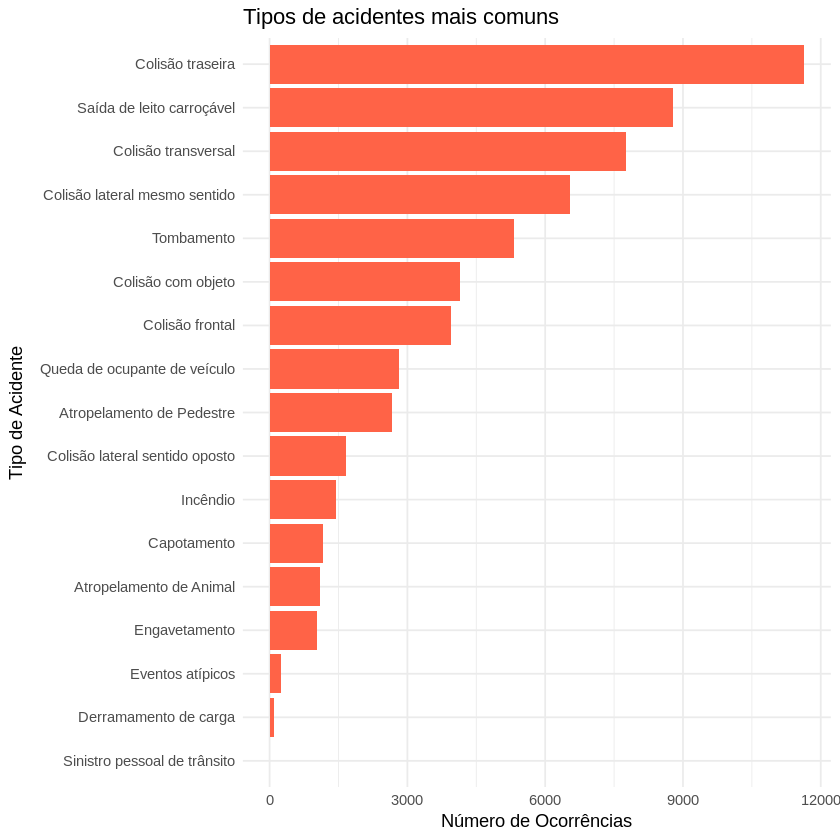

In [36]:
# Ordenando tipos de acidentes
dados %>%
  group_by(tipo_acidente) %>%
  summarise(ocorrencias = n()) %>%
  arrange(desc(ocorrencias)) %>%
  ggplot(aes(x = reorder(tipo_acidente, ocorrencias), y = ocorrencias)) +
  geom_bar(stat = "identity", fill = "tomato") +
  coord_flip() +
  labs(title = "Tipos de acidentes mais comuns",
       x = "Tipo de Acidente", y = "Número de Ocorrências") +
  theme_minimal()

In [37]:
# Criando nova coluna
dados <- dados %>%
  mutate(hora = as.numeric(substr(horario, 1, 2)))

In [38]:
# Calculando média
dados %>%
  group_by(tipo_acidente) %>%
  summarise(media_mortos = mean(as.numeric(mortos), na.rm = TRUE))

tipo_acidente,media_mortos
<chr>,<dbl>
Atropelamento de Animal,0.05586081
Atropelamento de Pedestre,0.30214205
Capotamento,0.03763901
Colisão com objeto,0.05434783
Colisão frontal,0.40926348
Colisão lateral mesmo sentido,0.02856706
Colisão lateral sentido oposto,0.09019844
Colisão transversal,0.05089550
Colisão traseira,0.04502492


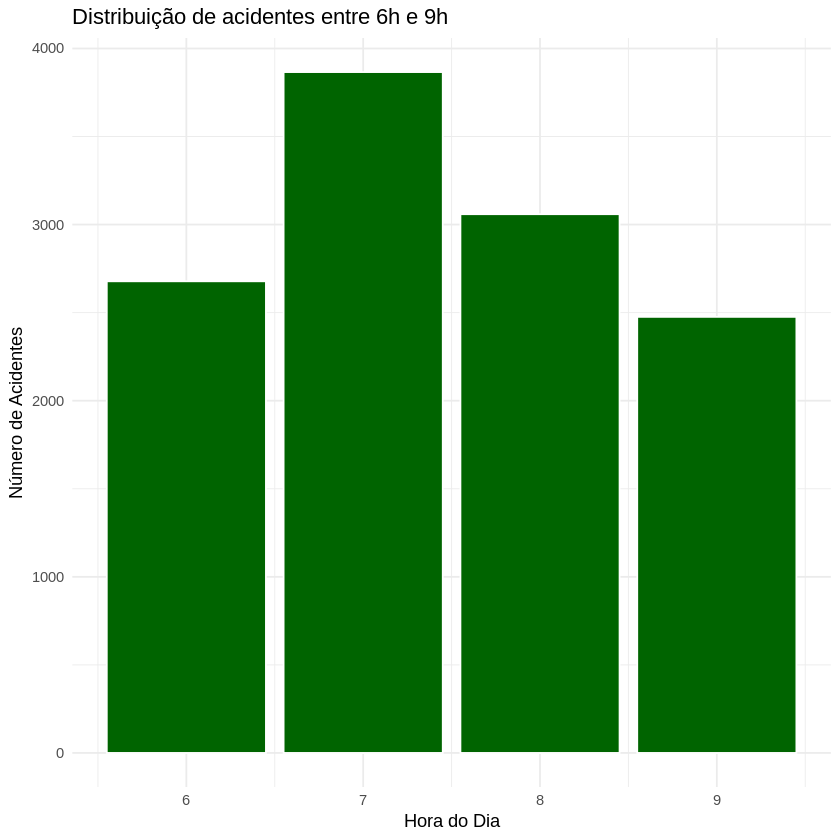

In [39]:
# Busca específica
dados %>%
  mutate(hora = as.numeric(substr(horario, 1, 2))) %>%
  filter(hora >= 6 & hora <= 9) %>%
  ggplot(aes(x = hora)) +
  geom_bar(fill = "darkgreen", color = "white") +
  scale_x_continuous(breaks = 6:9) +
  labs(title = "Distribuição de acidentes entre 6h e 9h",
       x = "Hora do Dia", y = "Número de Acidentes") +
  theme_minimal()

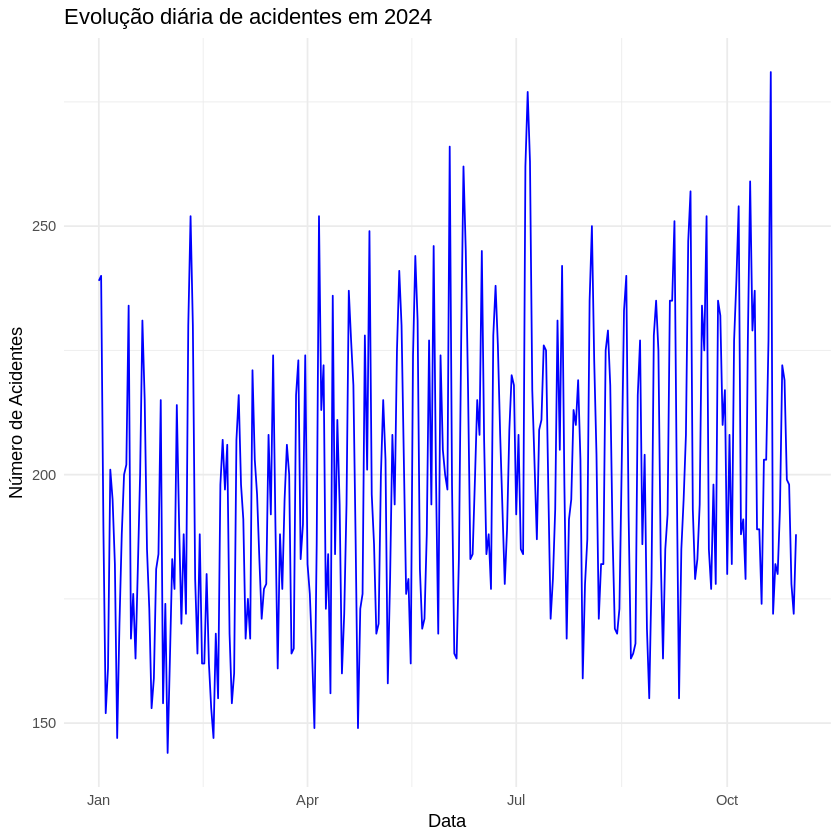

In [40]:
# Acidentes ao longo do tempo
dados %>%
  mutate(data = as.Date(data_inversa, format = "%d/%m/%Y")) %>%
  count(data) %>%
  ggplot(aes(x = data, y = n)) +
  geom_line(color = "blue") +
  labs(title = "Evolução diária de acidentes em 2024",
       x = "Data", y = "Número de Acidentes") +
  theme_minimal()

In [ ]:
# Agrupando e contando acidentes por estado
dados %>%
  group_by(uf) %>%
  summarise(total_acidentes = n()) %>%
  ggplot(aes(x = reorder(uf, -total_acidentes), y = total_acidentes)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Número total de acidentes por estado (UF)",
       x = "Estado (UF)", y = "Total de Acidentes") +
  theme_minimal()

In [ ]:
# Probabilidade de um acidente ocorrer em condições climáticas claras
dados %>%
  filter(!is.na(condicao_metereologica)) %>%
  mutate(claro = ifelse(condicao_metereologica == "Céu Claro", "Céu Claro", "Outras")) %>%
  count(claro) %>%
  mutate(percent = n / sum(n),
         label = paste0(claro, ": ", round(percent * 100, 1), "%")) %>%
  ggplot(aes(x = 2, y = percent, fill = claro)) +
  geom_col(width = 1, color = "white") +
  coord_polar(theta = "y") +
  xlim(0.5, 2.5) +
  geom_text(aes(label = label), position = position_stack(vjust = 0.5)) +
  labs(title = "Distribuição de acidentes por condição meteorológica") +
  theme_void() +
  theme(legend.position = "none")

In [ ]:
# Como a fase do dia afeta a ocorrência de acidentes?
dados %>%
  count(fase_dia, sort = TRUE) %>%
  ggplot(aes(x = reorder(fase_dia, n), y = n, fill = fase_dia)) +
  geom_col(show.legend = FALSE) +
  coord_flip() +
  labs(title = "Número de Acidentes por Fase do Dia", x = "Fase do Dia", y = "Número de Acidentes")

In [ ]:
# Insights sobre tipos de acidentes e causas predominantes

# Mortos por tipo de acidente
dados %>%
  group_by(tipo_acidente) %>%
  summarise(media_mortos = mean(mortos, na.rm = TRUE)) %>%
  ggplot(aes(x = reorder(tipo_acidente, media_mortos), y = media_mortos)) +
  geom_col(fill = "red") +
  coord_flip() +
  labs(title = "Média de mortos por tipo de acidente",
       x = "Tipo de Acidente", y = "Média de Mortos") +
  theme_minimal()
# Causas mais frequentes
dados %>%
  count(causa_acidente, sort = TRUE) %>%
  top_n(5) %>%
  ggplot(aes(x = reorder(causa_acidente, n), y = n)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(title = "Top 5 causas mais frequentes de acidentes",
       x = "Causa do Acidente", y = "Número de Acidentes") +
  theme_minimal()